# This is the main notebook for interrogating the results of models as they train

/allen/aics/modeling/theok/Projects/idle/hackathonfiles/cbvae2D_theo_20210208/ref_model/
{'batch_size': 32, 'channels_pt1': [0, 1, 2], 'crit_decD': 'nn.BCEWithLogitsLoss', 'crit_encD': 'nn.BCEWithLogitsLoss', 'crit_recon': 'integrated_cell.losses.BatchMSELoss', 'crit_z_class': 'torch.nn.NLLLoss', 'crit_z_ref': 'torch.nn.MSELoss', 'dataProvider': 'TargetDataProvider', 'data_save_path': '/allen/aics/modeling/theok/Projects/idle/hackathonfiles/cbvae2D_theo_20210208/data.pyt', 'dtype': 'float', 'gpu_ids': [0], 'hostname': 'dgx-aics-dcp-001', 'imdir': '/allen/aics/modeling/rorydm/projects/pytorch_integrated_cell/data/', 'init_meth': 'normal', 'kwargs_crit_decD': None, 'kwargs_crit_encD': None, 'kwargs_crit_recon': {}, 'kwargs_crit_z_class': None, 'kwargs_dec': {'activation_last': 'softplus', 'n_ch_ref': 2, 'n_ch_target': 1, 'n_classes': 24, 'n_latent_dim': 512}, 'kwargs_decD': {}, 'kwargs_decD_optim': {'betas': [0.5, 0.999]}, 'kwargs_dec_optim': {'betas': [0.9, 0.999]}, 'kwargs_dp': {'check

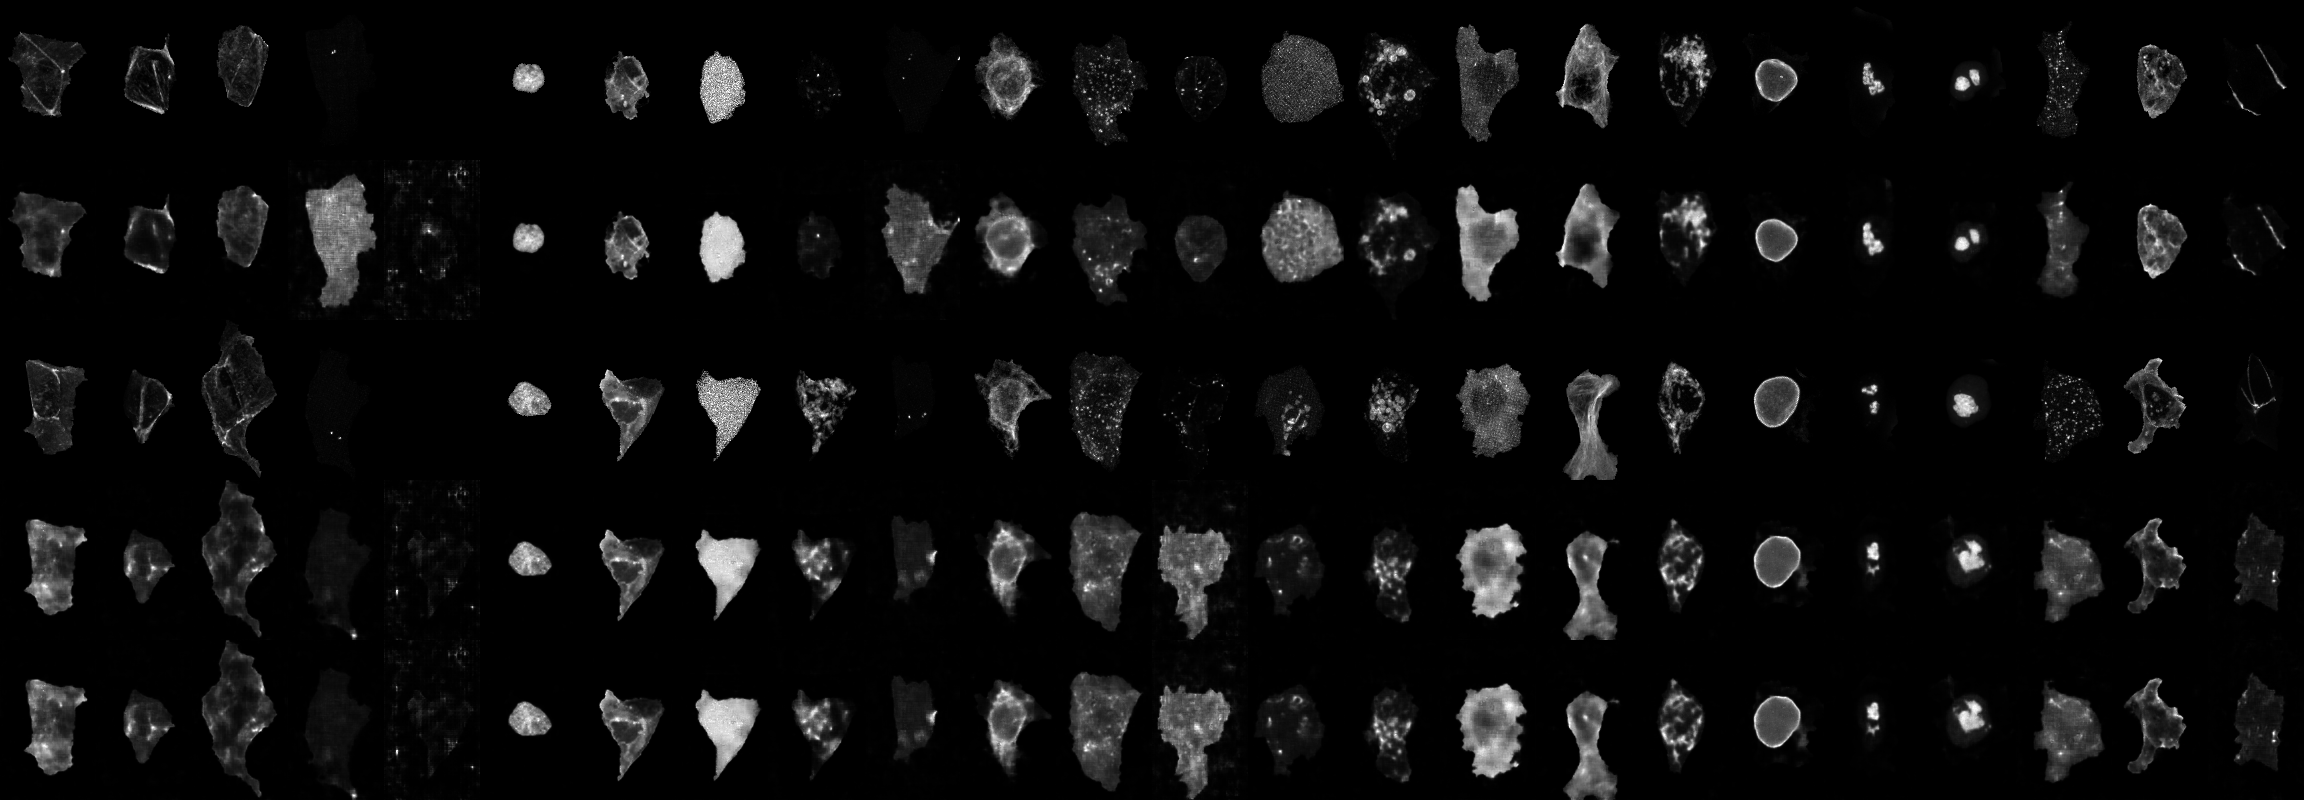

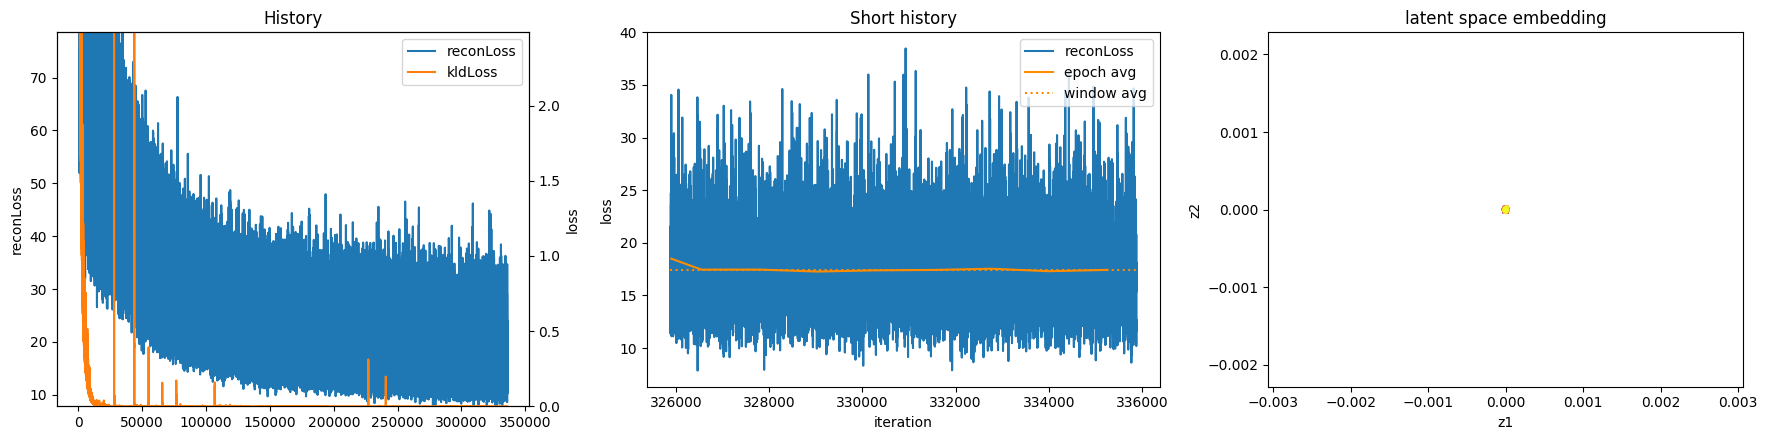

In [2]:
## import integrated_cell.SimpleLogger as SimpleLogger
import torch
from IPython.core.display import display
import pickle
import os
import PIL.Image
import numpy as np
import scipy.misc as misc
import glob
import json
from natsort import natsorted

%matplotlib inline

class RenamingUnpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'integrated_cell.SimpleLogger':
            module = 'integrated_cell.simplelogger'
        return super().find_class(module, name)


import warnings
warnings.filterwarnings("ignore")

dirs_to_search = [
        
#                     '/allen/aics/modeling/gregj/results/integrated_cell/test_cbvae_3D_avg_inten/*',
#                     '/allen/aics/modeling/gregj/results/integrated_cell/test_cbvae_beta_ref/*',
#                    './training_scripts/*/'
                    '/allen/aics/modeling/theok/Projects/idle/hackathonfiles/cbvae2D_theo_20210208'
    
                ]

model_dirs = list()

for my_dir in dirs_to_search:
    model_dirs += glob.glob(my_dir)

model_dirs = natsorted(model_dirs)[::-1]    
    

def show_dir(model_dir):    
    logger_file = '{0}/logger_tmp.pkl'.format(model_dir)
    
    if not os.path.exists(logger_file):
        print('Could not find logger at ' + logger_file)
        return

    print(model_dir)
    
    try:
        logger = RenamingUnpickler(open( logger_file, "rb" )).load()
#         logger = pickle.load( open( logger_file, "rb" ) )
        epoch = max(logger.log['epoch'])
    except:
        pass
    
    try:
        opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ))
    except:
        opt = json.load(open( '{0}/../args.json'.format(model_dir), "rb" ))

    print(opt)
    print('Epoch: ' + str(epoch))

    im_progress_path = '{0}/progress_{1}.png'.format(model_dir, int(epoch))
    im_progress = misc.imread(im_progress_path)

    im_history_path = '{0}/history.png'.format(model_dir)
    im_history = misc.imread(im_history_path)    

    im_history_short_path = '{0}/history_short.png'.format(model_dir)
    im_history_short = misc.imread(im_history_short_path)    

    im_embedding_path = '{0}/embedding.png'.format(model_dir)
    im_embedding = misc.imread(im_embedding_path)        

    display(PIL.Image.fromarray(im_progress))
    display(PIL.Image.fromarray(np.concatenate((im_history, im_history_short, im_embedding), 1)))
    print(' ')
    
for model_dir in model_dirs:
    
    sub_dirs = glob.glob(os.path.join(model_dir, 'ref_model/'))
    
    for sub_dir in sub_dirs:
        try:
            show_dir(sub_dir)
        except:
            print('could not load ' + model_dir)
            